## Basic information

### Data soureces
[Link](https://data.world/adamhelsinger)




### Data description

Data contain information about used of drinking water sources for region and countries. Information was collected for urban and rural areas in 1990 and 2015.

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.linalg as l   #moduł do obliczeń
import scipy.stats as s # moduł do statystyki
from matplotlib.legend_handler import HandlerBase

## Loading and cleaning data

In [2]:
df=pd.read_csv('Drinking-Water-Database-June-2015_75.csv', encoding= 'unicode_escape', delimiter=',')

### Data overview
#### Information (Type, Shape)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   437 non-null    object
 1   Unnamed: 1   462 non-null    object
 2   Unnamed: 2   464 non-null    object
 3   Unnamed: 3   462 non-null    object
 4   Unnamed: 4   459 non-null    object
 5   Unnamed: 5   459 non-null    object
 6   Unnamed: 6   460 non-null    object
 7   Unnamed: 7   459 non-null    object
 8   Unnamed: 8   451 non-null    object
 9   Unnamed: 9   449 non-null    object
 10  Unnamed: 10  449 non-null    object
 11  Unnamed: 11  450 non-null    object
 12  Unnamed: 12  449 non-null    object
 13  Unnamed: 13  463 non-null    object
 14  Unnamed: 14  461 non-null    object
 15  Unnamed: 15  461 non-null    object
 16  Unnamed: 16  462 non-null    object
 17  Unnamed: 17  461 non-null    object
dtypes: object(18)
memory usage: 67.6+ KB


#### Data frame view (head, tail)

In [4]:
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drinking water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Last update: June 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ISO Code,Countries and areas,Year,Use of drinking water sources (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Urban,NaN,NaN,NaN,NaN,Rural,NaN,NaN,NaN,NaN,Total,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Improved,NaN,NaN,Unimproved,NaN,Improved,NaN,NaN,Unimproved,NaN,Improved,NaN,NaN,Unimproved,NaN
7,NaN,NaN,NaN,Total improved,Piped on premises,Other improved,Other unimproved,Surface water,Total improved,Piped on premises,Other improved,Other unimproved,Surface water,Total improved,Piped on premises,Other improved,Other unimproved,Surface water
8,AFG,Afghanistan,1990,-,3,-,-,-,-,0,-,-,-,-,1,-,-,-
9,AFG,Afghanistan,2015,78,31,47,20,2,47,5,42,46,7,55,12,43,39,6


In [5]:
df.tail(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
460,NaN,Caucasus and Central Asia,1990,95,83,12,4,1,79,29,50,11,10,87,54,33,8,5
461,NaN,Caucasus and Central Asia,2015,98,91,7,1,1,81,38,43,10,9,89,61,28,5,6
462,NaN,Developed regions,1990,99,97,2,1,0,93,79,14,7.000000000000001,0,98,92,6,2,0
463,NaN,Developed regions,2015,100,98,2,0,0,98,89,9,1,1,99,96,3,1,0
464,NaN,Developing regions,1990,93,68,25,6,1,59,11,48,28.999999999999996,12,70,31,39,22,8
465,NaN,Developing regions,2015,95,72,23,5,0,83,28,55,12,5,89,49,40,8,3
466,NaN,Least Developed Countries,1990,80,29,51,16,4,43,2,41,34,23,51,7,44,30,19
467,NaN,World,2015,86,32,54,12,2,62,3,59,27,11,69,12,57,23,8
468,NaN,World,1990,95,79,16,4,1,62,18,44,27,11,76,44,32,17,7
469,NaN,World,2015,96,79,17,4,0,84,33,51,12,4,91,58,33,7.000000000000001,2


#### Organize the data frame 

Data set contain information about 215 countries (information about them are in  list_countries) 

Tail of data frame contain summary about region (informationa about it in df_summary)

Action to be done:
- Need to use Multi-Colum index 
- Split data for region data frame and country data frame

##### Multi-Colum index

In [6]:
columns=[('Data','Areas','ISO Code'),
         ('Data','Areas','Countries and areas 1'),
         ('Data','Areas','Year 2'),
         ('Urban','Improved', 'Total improved 3'),
         ('Urban','Improved', 'Piped on premises 4'),
         ('Urban','Improved', 'Other improved 5'),
         ('Urban','Unimproved' ,'Other unimproved 6'),
         ('Urban','Unimproved', 'Surface water 7'),
         ('Rural','Improved', 'Total improved 8'),
         ('Rural','Improved', 'Piped on premises 9'),
         ('Rural','Improved', 'Other improved 10'),
         ('Rural','Unimproved', 'Other unimproved 11'),
         ('Rural','Unimproved', 'Surface water 12'),
         ('Total','Improved', 'Total improved 13'),
         ('Total','Improved', 'Piped on premises 14'),
         ('Total','Improved', 'Other improved 15'),
         ('Total','Unimproved', 'Other unimproved 16'),
         ('Total','Unimproved', 'Surface water 17') ]
#Data in rows from 8 to 470
df2=df.iloc[8:470]
df2.columns = pd.MultiIndex.from_tuples(columns)
df2.reset_index(inplace = True)
df2.drop(['index'], axis = 1, inplace = True)

C:\Users\E9951616\Miniconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\E9951616\Miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df2.head(4)

Data                                         Urban                      \
     Areas                                      Improved                       
  ISO Code Countries and areas 1 Year 2 Total improved 3 Piped on premises 4   
0      AFG           Afghanistan   1990                -                   3   
1      AFG           Afghanistan   2015               78                  31   
2      ALB               Albania   1990              100                  98   
3      ALB               Albania   2015               95                  86   

                                                                 Rural  \
                           Unimproved                         Improved   
  Other improved 5 Other unimproved 6 Surface water 7 Total improved 8   
0                -                  -               -                -   
1               47                 20               2               47   
2                2                  0               0                -   
3                9                  5               0               95   

                                                                              \
                                                 Unimproved                    
  Piped on premises 9 Other improved 10 Other unimproved 11 Surface water 12   
0                   0                 -                   -                -   
1                   5                42                  46                7   
2                   -                 -                   -                -   
3                  76                19                   5                0   

              Total                                         \
           Improved                                          
  Total improved 13 Piped on premises 14 Other improved 15   
0                 -                    1                 -   
1                55                   12                43   
2                 -                    -                 -   
3                95                   82                13   

                                        
           Unimproved                   
  Other unimproved 16 Surface water 17  
0                   -                -  
1                  39                6  
2                   -                -  
3                   5                0

##### Information about areas

In [8]:
#df2[df2[('Data','Areas','ISO Code')]=='NaN']
list_countries=df2[('Data','Areas','ISO Code')].unique()

In [9]:
len(df2[('Data','Areas','ISO Code')].unique())

216

In [10]:
list_areas=df2[('Data','Areas','Countries and areas 1')].unique()
list_areas

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "C??te d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Dem. People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guin

##### Split data for country and region

In [11]:
df2.loc[(df2[('Data','Areas','Countries and areas 1')]=='SUMMARY INDICATORS')]

Data                                         Urban  \
       Areas                                      Improved   
    ISO Code Countries and areas 1 Year 2 Total improved 3   
431      NaN    SUMMARY INDICATORS    NaN              NaN   

                                                                             \
                                                 Unimproved                   
    Piped on premises 4 Other improved 5 Other unimproved 6 Surface water 7   
431                 NaN              NaN                NaN             NaN   

               Rural                                        \
            Improved                                         
    Total improved 8 Piped on premises 9 Other improved 10   
431              NaN                 NaN               NaN   

                                                     Total  \
             Unimproved                           Improved   
    Other unimproved 11 Surface water 12 Total improved 13   
431                 NaN              NaN               NaN   

                                                                \
                                                    Unimproved   
    Piped on premises 14 Other improved 15 Other unimproved 16   
431                  NaN               NaN                 NaN   

                      
                      
    Surface water 17  
431              NaN

In [12]:
df2.iloc[428:440]

Data                                               Urban  \
       Areas                                            Improved   
    ISO Code       Countries and areas 1 Year 2 Total improved 3   
428      ZWE                    Zimbabwe   1990              100   
429      ZWE                    Zimbabwe   2015               97   
430      NaN                         NaN    NaN              NaN   
431      NaN          SUMMARY INDICATORS    NaN              NaN   
432      NaN          Sub-Saharan Africa   1990               83   
433      NaN                         NaN   2015               87   
434      NaN             Northern Africa   1990               95   
435      NaN             Northern Africa   2015               95   
436      NaN                Eastern Asia   1990               97   
437      NaN                Eastern Asia   2015               98   
438      NaN  Eastern Asia without China   1990               97   
439      NaN                         NaN   2015               99   

                                                                             \
                                                 Unimproved                   
    Piped on premises 4 Other improved 5 Other unimproved 6 Surface water 7   
428                  98                2                  0               0   
429                  74               23                  3               0   
430                 NaN              NaN                NaN             NaN   
431                 NaN              NaN                NaN             NaN   
432                  43               40                 13               4   
433                  33               54                 11               2   
434                  86                9                  5               0   
435                  92                3                  5               0   
436                  79               18                  2               1   
437                  88               10                  2               0   
438                  94                3                  3               0   
439                  96                3                  1               0   

               Rural                                        \
            Improved                                         
    Total improved 8 Piped on premises 9 Other improved 10   
428               71                   7                64   
429               67                   5                62   
430              NaN                 NaN               NaN   
431              NaN                 NaN               NaN   
432               34                   4                30   
433               56                   5                51   
434               80                  33                47   
435               90                  78                12   
436               56                  11                45   
437               93                  56                37   
438               92                   2                90   
439               96                  74                22   

                                                     Total  \
             Unimproved                           Improved   
    Other unimproved 11 Surface water 12 Total improved 13   
428                  17               12                79   
429                  24                9                77   
430                 NaN              NaN               NaN   
431                 NaN              NaN               NaN   
432                  32               34                48   
433  28.999999999999996               15                68   
434                  17                3                87   
435                   9                1                93   
436                  35                9                68   
437                   5                2                96   
438                   2                6                96   
43

In [13]:
df_countries=df2.iloc[:430]

In [14]:
df_countries

Data                                         Urban  \
       Areas                                      Improved   
    ISO Code Countries and areas 1 Year 2 Total improved 3   
0        AFG           Afghanistan   1990                -   
1        AFG           Afghanistan   2015               78   
2        ALB               Albania   1990              100   
3        ALB               Albania   2015               95   
4        DZA               Algeria   1990               97   
..       ...                   ...    ...              ...   
425      YEM                 Yemen   2015                -   
426      ZMB                Zambia   1990               88   
427      ZMB                Zambia   2015               86   
428      ZWE              Zimbabwe   1990              100   
429      ZWE              Zimbabwe   2015               97   

                                                                             \
                                                 Unimproved                   
    Piped on premises 4 Other improved 5 Other unimproved 6 Surface water 7   
0                     3                -                  -               -   
1                    31               47                 20               2   
2                    98                2                  0               0   
3                    86                9                  5               0   
4                    87               10                  3               0   
..                  ...              ...                ...             ...   
425                   -                -                  -               -   
426                  47               41                 11               1   
427                  36               50                 12               2   
428                  98                2                  0               0   
429                  74               23                  3               0   

               Rural                                        \
            Improved                                         
    Total improved 8 Piped on premises 9 Other improved 10   
0                  -                   0                 -   
1                 47                   5                42   
2                  -                   -                 -   
3                 95                  76                19   
4                 85                  47                38   
..               ...                 ...               ...   
425                -                   -                 -   
426               24                   1                23   
427               51                   2                49   
428               71                   7                64   
429               67                   5                62   

                                                     Total  \
             Unimproved                           Improved   
    Other unimproved 11 Surface water 12 Total improved 13   
0                     -                -                 -   
1                    46                7                55   
2                     -                -                 -   
3                     5                0                95   
4                    13                2                91   
..                  ...              ...               ...   
425                   -                -                 -   
426                  44               32                49   
427                  30               19                65   
428                  17               12                79   
429                  24                9                77   

                                                                \
                                                    Unimproved   
    Piped on premises 14 Other improved 15 Other unimproved 16   
0                      1                 -                   -   
1                     12      

In [15]:
len(df_countries[('Data','Areas','Countries and areas 1')].unique())

215

In [16]:
df_summary=df2.iloc[432:]
df_summary.reset_index(inplace = True)
df_summary.drop(['index'], axis = 1, inplace = True)
df_summary.head(30)

C:\Users\E9951616\Miniconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\E9951616\Miniconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Data                                                     Urban  \
      Areas                                                  Improved   
   ISO Code             Countries and areas 1 Year 2 Total improved 3   
0       NaN                Sub-Saharan Africa   1990               83   
1       NaN                               NaN   2015               87   
2       NaN                   Northern Africa   1990               95   
3       NaN                   Northern Africa   2015               95   
4       NaN                      Eastern Asia   1990               97   
5       NaN                      Eastern Asia   2015               98   
6       NaN        Eastern Asia without China   1990               97   
7       NaN                               NaN   2015               99   
8       NaN                     Southern Asia   1990               90   
9       NaN                     Southern Asia   2015               96   
10      NaN       Southern Asia without India   1990               93   
11      NaN                               NaN   2015               92   
12      NaN                South Eastern Asia   1990               90   
13      NaN                South Eastern Asia   2015               95   
14      NaN                      Western Asia   1990               95   
15      NaN                      Western Asia   2015               96   
16      NaN                           Oceania   1990               92   
17      NaN                           Oceania   2015               94   
18      NaN  Latin American and the Caribbean   1990               94   
19      NaN  Latin American and the Caribbean   2015               97   
20      NaN         Caucasus and Central Asia   1990               95   
21      NaN         Caucasus and Central Asia   2015               98   
22      NaN                 Developed regions   1990               99   
23      NaN                 Developed regions   2015              100   
24      NaN                Developing regions   1990               93   
25      NaN                Developing regions   2015               95   
26      NaN         Least Developed Countries   1990               80   
27      NaN                             World   2015               86   
28      NaN                             World   1990               95   
29      NaN                             World   2015               96   

                                                                            \
                                                Unimproved                   
   Piped on premises 4 Other improved 5 Other unimproved 6 Surface water 7   
0                   43               40                 13               4   
1                   33               54                 11               2   
2                   86                9                  5               0   
3                   92                3                  5               0   
4                   79               18                  2               1   
5                   88               10                  2               0   
6                   94                3                  3               0   
7                   96                3                  1               0   
8                   50               40                  9               1   
9                   56               40                  4               0   
10                  59               34                  6               1   
11                  62               30                  8               0   
12                  42               48  7.000000000000001               3   
13                  51               44                  5               0   
14                  85               10                  4               1   
15                  92                4                  4               0   
16                  74               18                  5               3   
17                  74               

### Short review of the data

In [17]:
df_countries.describe()

Data                                         Urban  \
          Areas                                      Improved   
       ISO Code Countries and areas 1 Year 2 Total improved 3   
count       430                   430    430              428   
unique      215                   215      2               44   
top         AFG           Afghanistan   1990              100   
freq          2                     2    215              113   

                                                                \
                                                    Unimproved   
       Piped on premises 4 Other improved 5 Other unimproved 6   
count                  428              428                428   
unique                  88               74                 38   
top                      -                -                  0   
freq                    99              101                114   

                                  Rural                                        \
                               Improved                                         
       Surface water 7 Total improved 8 Piped on premises 9 Other improved 10   
count              428              418                 418               418   
unique              15               77                  87                88   
top                  0                -                   -                 -   
freq               224               89                 101               111   

                                                        Total  \
                Unimproved                           Improved   
       Other unimproved 11 Surface water 12 Total improved 13   
count                  418              418               430   
unique                  59               46                67   
top                      -                0               100   
freq                    89              115                94   

                                                                   \
                                                       Unimproved   
       Piped on premises 14 Other improved 15 Other unimproved 16   
count                   430               430                 430   
unique                   95                79                  49   
top                       -                 -                   0   
freq                     84                87                  95   

                         
                         
       Surface water 17  
count               430  
unique               36  
top                   0  
freq                147

In [18]:
df_summary.describe()

Data                                         Urban  \
          Areas                                      Improved   
       ISO Code Countries and areas 1 Year 2 Total improved 3   
count         0                    27     30               30   
unique        0                    15      2               14   
top         NaN                 World   1990               95   
freq        NaN                     3     15                7   

                                                                \
                                                    Unimproved   
       Piped on premises 4 Other improved 5 Other unimproved 6   
count                   30               30                 30   
unique                  24               21                 14   
top                     79                3                  4   
freq                     3                4                  7   

                                  Rural                                        \
                               Improved                                         
       Surface water 7 Total improved 8 Piped on premises 9 Other improved 10   
count               30               30                  30                30   
unique               5               23                  22                27   
top                  0               63                  11                59   
freq                14                2                   5                 2   

                                                        Total  \
                Unimproved                           Improved   
       Other unimproved 11 Surface water 12 Total improved 13   
count                   30               30                30   
unique                  20               18                21   
top                     12                1                89   
freq                     3                4                 3   

                                                                   \
                                                       Unimproved   
       Piped on premises 14 Other improved 15 Other unimproved 16   
count                    30                30                  30   
unique                   27                22                  20   
top                      30                33                   8   
freq                      2                 3                   4   

                         
                         
       Surface water 17  
count                30  
unique               14  
top                   1  
freq                  6

In [19]:
df_countries.info()
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Data, Areas, ISO Code)                   430 non-null    object
 1   (Data, Areas, Countries and areas 1)      430 non-null    object
 2   (Data, Areas, Year 2)                     430 non-null    object
 3   (Urban, Improved, Total improved 3)       428 non-null    object
 4   (Urban, Improved, Piped on premises 4)    428 non-null    object
 5   (Urban, Improved, Other improved 5)       428 non-null    object
 6   (Urban, Unimproved, Other unimproved 6)   428 non-null    object
 7   (Urban, Unimproved, Surface water 7)      428 non-null    object
 8   (Rural, Improved, Total improved 8)       418 non-null    object
 9   (Rural, Improved, Piped on premises 9)    418 non-null    object
 10  (Rural, Improved, Other improved 10)      418 non-

## Region Data analysis

### Data preparation

#### Cleaning the NaN data - df_summary

In [20]:
df_summary[('Data', 'Areas', 'Countries and areas 1')].unique()

array(['Sub-Saharan Africa', nan, 'Northern Africa', 'Eastern Asia',
       'Eastern Asia without China', 'Southern Asia',
       'Southern Asia without India', 'South Eastern Asia',
       'Western Asia', 'Oceania', 'Latin American and the Caribbean',
       'Caucasus and Central Asia', 'Developed regions',
       'Developing regions', 'Least Developed Countries', 'World'],
      dtype=object)

In [21]:
df_summary1 = df_summary[df_summary[('Data', 'Areas', 'Countries and areas 1')].notna()]

In [22]:
df_summary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Data, Areas, ISO Code)                   0 non-null      object
 1   (Data, Areas, Countries and areas 1)      27 non-null     object
 2   (Data, Areas, Year 2)                     27 non-null     object
 3   (Urban, Improved, Total improved 3)       27 non-null     object
 4   (Urban, Improved, Piped on premises 4)    27 non-null     object
 5   (Urban, Improved, Other improved 5)       27 non-null     object
 6   (Urban, Unimproved, Other unimproved 6)   27 non-null     object
 7   (Urban, Unimproved, Surface water 7)      27 non-null     object
 8   (Rural, Improved, Total improved 8)       27 non-null     object
 9   (Rural, Improved, Piped on premises 9)    27 non-null     object
 10  (Rural, Improved, Other improved 10)      27 non-nul

#### Type verification
All number data type object, need to be changed for float64

In [23]:
df_summary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Data, Areas, ISO Code)                   0 non-null      object
 1   (Data, Areas, Countries and areas 1)      27 non-null     object
 2   (Data, Areas, Year 2)                     27 non-null     object
 3   (Urban, Improved, Total improved 3)       27 non-null     object
 4   (Urban, Improved, Piped on premises 4)    27 non-null     object
 5   (Urban, Improved, Other improved 5)       27 non-null     object
 6   (Urban, Unimproved, Other unimproved 6)   27 non-null     object
 7   (Urban, Unimproved, Surface water 7)      27 non-null     object
 8   (Rural, Improved, Total improved 8)       27 non-null     object
 9   (Rural, Improved, Piped on premises 9)    27 non-null     object
 10  (Rural, Improved, Other improved 10)      27 non-nul

In [24]:
df_summary1= df_summary1.astype({('Data', 'Areas', 'ISO Code'): str,
                                 ('Data', 'Areas', 'Countries and areas 1'):str,
                                 ('Data', 'Areas', 'Year 2'):str,
                                 ('Urban', 'Improved', 'Total improved 3'):float ,
                                 ('Urban', 'Improved', 'Piped on premises 4'):float,
                                 ('Urban', 'Improved', 'Other improved 5'):float,
                                 ('Urban', 'Unimproved', 'Other unimproved 6'):float ,
                                 ('Urban', 'Unimproved', 'Surface water 7'):float,
                                 ('Rural', 'Improved', 'Total improved 8'):float,
                                 ('Rural', 'Improved', 'Piped on premises 9'):float,
                                 ('Rural', 'Improved', 'Other improved 10'):float,
                                 ('Rural', 'Unimproved', 'Other unimproved 11'):float ,
                                 ('Rural', 'Unimproved', 'Surface water 12'):float,
                                 ('Total', 'Improved', 'Total improved 13'):float,                                 
                                 ('Total', 'Improved', 'Piped on premises 14'):float ,
                                 ('Total', 'Improved', 'Other improved 15'):float,
                                 ('Total', 'Unimproved', 'Other unimproved 16'):float,
                                 ('Total', 'Unimproved', 'Surface water 17'):float,
                                 
                                }, errors='raise') 


In [25]:
df_summary1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Data, Areas, ISO Code)                   27 non-null     object 
 1   (Data, Areas, Countries and areas 1)      27 non-null     object 
 2   (Data, Areas, Year 2)                     27 non-null     object 
 3   (Urban, Improved, Total improved 3)       27 non-null     float64
 4   (Urban, Improved, Piped on premises 4)    27 non-null     float64
 5   (Urban, Improved, Other improved 5)       27 non-null     float64
 6   (Urban, Unimproved, Other unimproved 6)   27 non-null     float64
 7   (Urban, Unimproved, Surface water 7)      27 non-null     float64
 8   (Rural, Improved, Total improved 8)       27 non-null     float64
 9   (Rural, Improved, Piped on premises 9)    27 non-null     float64
 10  (Rural, Improved, Other improved 10)    

#### Data description (basic statistic)

In [26]:
df_summary1990=df_summary1[df_summary['Data', 'Areas', 'Year 2']=='1990']
df_summary2015=df_summary1[df_summary['Data', 'Areas', 'Year 2']=='2015']

C:\Users\E9951616\AppData\Local\Temp/ipykernel_23356/4082015297.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_summary1990=df_summary1[df_summary['Data', 'Areas', 'Year 2']=='1990']
C:\Users\E9951616\AppData\Local\Temp/ipykernel_23356/4082015297.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_summary2015=df_summary1[df_summary['Data', 'Areas', 'Year 2']=='2015']


In [27]:
df_summary1990.describe()

Urban                                       \
              Improved                                        
      Total improved 3 Piped on premises 4 Other improved 5   
count        15.000000            15.00000        15.000000   
mean         92.533333            70.40000        22.133333   
std           5.139020            20.99932        16.509161   
min          80.000000            29.00000         2.000000   
25%          91.000000            54.50000         9.500000   
50%          94.000000            79.00000        18.000000   
75%          95.000000            85.50000        37.000000   
max          99.000000            97.00000        51.000000   

                                                    Rural                      \
              Unimproved                         Improved                       
      Other unimproved 6 Surface water 7 Total improved 8 Piped on premises 9   
count               15.0       15.000000        15.000000            15.00000   
mean                 6.0        1.466667        64.666667            20.20000   
std                  4.0        1.355764        17.698534            21.00068   
min                  1.0        0.000000        34.000000             2.00000   
25%                  4.0        1.000000        57.500000             6.00000   
50%                  5.0        1.000000        63.000000            11.00000   
75%                  6.5        2.000000        76.000000            31.00000   
max                 16.0        4.000000        93.000000            79.00000   

                                                              \
                                 Unimproved                    
      Other improved 10 Other unimproved 11 Surface water 12   
count         15.000000           15.000000        15.000000   
mean          44.466667           21.866667        13.466667   
std           18.825768            9.818835        11.444691   
min           14.000000            2.000000         0.000000   
25%           28.500000           17.000000         7.000000   
50%           45.000000           22.000000        10.000000   
75%           54.000000           29.000000        16.000000   
max           90.000000           35.000000        41.000000   

                  Total                                         \
               Improved                                          
      Total improved 13 Piped on premises 14 Other improved 15   
count         15.000000            15.000000         15.000000   
mean          75.000000            41.933333         33.066667   
std           15.793308            25.549578         14.997460   
min           48.000000             7.000000          6.000000   
25%           69.000000            22.000000         25.500000   
50%           76.000000            31.000000         33.000000   
75%           86.000000            63.000000         41.500000   
max           98.000000            92.000000         55.000000   

                                            
               Unimproved                   
      Other unimproved 16 Surface water 17  
count           15.000000        15.000000  
mean            15.933333         9.066667  
std              8.631062         9.066947  
min              2.000000         0.000000  
25%              9.500000         3.500000  
50%             17.000000         7.000000  
75%             22.500000         8.500000  
max             30.000000        31.000000

In [28]:
df_summary2015.describe()

Urban                                       \
              Improved                                        
      Total improved 3 Piped on premises 4 Other improved 5   
count        12.000000           12.000000        12.000000   
mean         95.500000           76.583333        18.916667   
std           3.424511           20.615344        17.997264   
min          86.000000           32.000000         2.000000   
25%          95.000000           68.000000         3.750000   
50%          96.000000           83.500000        13.500000   
75%          97.250000           92.000000        27.250000   
max         100.000000           98.000000        54.000000   

                                                    Rural                      \
              Unimproved                         Improved                       
      Other unimproved 6 Surface water 7 Total improved 8 Piped on premises 9   
count          12.000000       12.000000        12.000000           12.000000   
mean            4.083333        0.416667        82.166667           43.416667   
std             2.968267        0.792961        14.941299           30.239824   
min             0.000000        0.000000        44.000000            3.000000   
25%             2.750000        0.000000        82.500000           17.000000   
50%             4.000000        0.000000        85.000000           35.500000   
75%             5.000000        0.250000        90.250000           70.500000   
max            12.000000        2.000000        98.000000           89.000000   

                                                              \
                                 Unimproved                    
      Other improved 10 Other unimproved 11 Surface water 12   
count         12.000000           12.000000        12.000000   
mean          38.750000           10.666667         7.166667   
std           23.668641            6.343692        10.827854   
min            7.000000            1.000000         1.000000   
25%           15.000000            8.000000         1.750000   
50%           40.000000           10.000000         4.000000   
75%           56.000000           12.000000         6.750000   
max           74.000000           27.000000        40.000000   

                  Total                                         \
               Improved                                          
      Total improved 13 Piped on premises 14 Other improved 15   
count         12.000000            12.000000         12.000000   
mean          87.916667            58.500000         29.416667   
std           12.551409            28.773409         21.597383   
min           56.000000            12.000000          3.000000   
25%           89.000000            32.250000          6.750000   
50%           92.000000            59.500000         29.500000   
75%           95.000000            86.750000         44.250000   
max           99.000000            96.000000         63.000000   

                                            
               Unimproved                   
      Other unimproved 16 Surface water 17  
count           12.000000        12.000000  
mean             7.333333         4.750000  
std              5.789227         8.593073  
min              1.000000         0.000000  
25%              4.000000         1.000000  
50%              6.000000         1.500000  
75%              8.000000         3.750000  
max             23.000000        31.000000

Iprovment observed - mean value for both Urban and Rural areas better in 2015. In 2015 we have missing information about some region.

Need to be checked if in the research did not omit regions where the value of total improvment was at the lowest level.

In [29]:
table_t_imp_urban = pd.pivot_table(df_summary1,index=[('Data', 'Areas', 'Countries and areas 1')],
                                          columns=[('Data', 'Areas', 'Year 2')],
                                          values=[('Urban', 'Improved', 'Total improved 3')])
table_t_imp_rural= pd.pivot_table(df_summary1,index=[('Data', 'Areas', 'Countries and areas 1')],
                                          columns=[('Data', 'Areas', 'Year 2')],
                                          values=[('Rural', 'Improved', 'Total improved 8')])

In [30]:
table_t_imp_urban.info()
table_t_imp_urban.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Caucasus and Central Asia to World
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (Urban, Improved, Total improved 3, 1990)  15 non-null     float64
 1   (Urban, Improved, Total improved 3, 2015)  11 non-null     float64
dtypes: float64(2)
memory usage: 360.0+ bytes


15

In [31]:
table_t_imp_urban_1 = table_t_imp_urban[table_t_imp_urban[
    (('Urban', 'Improved', 'Total improved 3', '2015'))].notna()]
table_t_imp_urban_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Caucasus and Central Asia to World
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (Urban, Improved, Total improved 3, 1990)  11 non-null     float64
 1   (Urban, Improved, Total improved 3, 2015)  11 non-null     float64
dtypes: float64(2)
memory usage: 264.0+ bytes


In [32]:
table_t_imp_rural.info()
table_t_imp_rural.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Caucasus and Central Asia to World
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (Rural, Improved, Total improved 8, 1990)  15 non-null     float64
 1   (Rural, Improved, Total improved 8, 2015)  11 non-null     float64
dtypes: float64(2)
memory usage: 360.0+ bytes


15

In [33]:
table_t_imp_rural_1 = table_t_imp_rural[table_t_imp_rural[
    (('Rural', 'Improved', 'Total improved 8', '2015'))].notna()]
table_t_imp_rural_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Caucasus and Central Asia to World
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (Rural, Improved, Total improved 8, 1990)  11 non-null     float64
 1   (Rural, Improved, Total improved 8, 2015)  11 non-null     float64
dtypes: float64(2)
memory usage: 264.0+ bytes


improvment overview (region which appeared on both years)


In [34]:
table_t_imp_urban_1.describe()

Urban            
                                    Improved            
                            Total improved 3            
('Data', 'Areas', 'Year 2')             1990        2015
count                              11.000000   11.000000
mean                               94.090909   95.909091
std                                 2.736953    2.385563
min                                90.000000   91.000000
25%                                92.500000   95.000000
50%                                95.000000   96.000000
75%                                95.000000   97.500000
max                                99.000000  100.000000

In [35]:
table_t_imp_rural_1.describe()

Rural           
                                    Improved           
                            Total improved 8           
('Data', 'Areas', 'Year 2')             1990       2015
count                              11.000000  11.000000
mean                               66.181818  83.000000
std                                14.606972  14.567086
min                                37.000000  44.000000
25%                                60.500000  82.000000
50%                                63.000000  86.000000
75%                                74.500000  90.500000
max                                93.000000  98.000000

Iprovment observed - mean value for both Urban and Rural areas better in 2015.

### Year 1990 
Review how sytuation with used of drinking water looked like in 1990.
- In which region there was the best situation?
-

#### Markers legend

Total improved, 
Piped on permises, 
Other improved, 
Other uniproved, 
Surface water, 

In [36]:


list_color  = ["blue","blue","blue", "orange","orange"]
list_mak    = ["x","o","|",'*',">"]
list_lab    = ['Total improved','Piped on permises','Other improved',"Other unimproved",'Surface water']
class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]


#### Urban/Rural

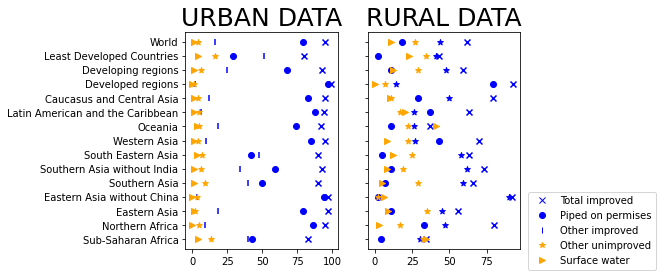

In [37]:

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.scatter(df_summary1990['Urban', 'Improved', 'Total improved 3'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
ax0.scatter(df_summary1990['Urban', 'Improved', 'Piped on premises 4'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
ax0.scatter(df_summary1990['Urban', 'Improved', 'Other improved 5'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='|', color= 'blue'
                )
ax0.scatter(df_summary1990['Urban', 'Unimproved', 'Other unimproved 6'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
ax0.scatter(df_summary1990['Urban', 'Unimproved', 'Surface water 7'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
ax0.set_title('URBAN DATA',fontsize = 25)

ax1.scatter(df_summary1990['Rural', 'Improved', 'Total improved 8'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
ax1.scatter(df_summary1990['Rural', 'Improved', 'Piped on premises 9'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
ax1.scatter(df_summary1990['Rural', 'Improved', 'Other improved 10'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'blue'
                )
ax1.scatter(df_summary1990['Rural', 'Unimproved', 'Other unimproved 11'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
ax1.scatter(df_summary1990['Rural', 'Unimproved', 'Surface water 12'],
                 df_summary1990['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
ax1.set_title('RURAL DATA',fontsize = 25)
ax1.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}, loc='upper left', borderaxespad=16)

#### Total

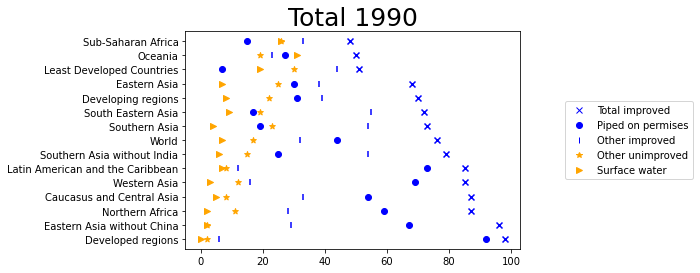

In [38]:
df_summary1990_totalsort=df_summary1990.sort_values(('Total', 'Improved', 'Total improved 13'),ascending=False)
plt.scatter(df_summary1990_totalsort['Total', 'Improved', 'Total improved 13'],
                 df_summary1990_totalsort['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
plt.scatter(df_summary1990_totalsort['Total', 'Improved', 'Piped on premises 14'],
                 df_summary1990_totalsort['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
plt.scatter(df_summary1990_totalsort['Total', 'Improved', 'Other improved 15'],
                 df_summary1990_totalsort['Data', 'Areas', 'Countries and areas 1'],
                 marker='|', color= 'blue'
                )
plt.scatter(df_summary1990_totalsort['Total', 'Unimproved', 'Other unimproved 16'],
                 df_summary1990_totalsort['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
plt.scatter(df_summary1990_totalsort['Total', 'Unimproved', 'Surface water 17'],
                 df_summary1990_totalsort['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
#label

plt.title('Total 1990',fontsize = 25)
plt.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}, loc='center left', borderaxespad=38)

### Year 2015
Review how sytuation with used of drinking water looked like in 1990.
- In which region there was the best situation?
-


In [39]:
df_summary2015=df_summary2015.sort_values(('Urban', 'Improved', 'Total improved 3'),ascending=False)
df_summary2015.head()

Data                                                     Urban  \
      Areas                                                  Improved   
   ISO Code             Countries and areas 1 Year 2 Total improved 3   
23      nan                 Developed regions   2015            100.0   
5       nan                      Eastern Asia   2015             98.0   
21      nan         Caucasus and Central Asia   2015             98.0   
19      nan  Latin American and the Caribbean   2015             97.0   
9       nan                     Southern Asia   2015             96.0   

                                                                            \
                                                Unimproved                   
   Piped on premises 4 Other improved 5 Other unimproved 6 Surface water 7   
23                98.0              2.0                0.0             0.0   
5                 88.0             10.0                2.0             0.0   
21                91.0              7.0                1.0             1.0   
19                94.0              3.0                3.0             0.0   
9                 56.0             40.0                4.0             0.0   

              Rural                                                            \
           Improved                                                Unimproved   
   Total improved 8 Piped on premises 9 Other improved 10 Other unimproved 11   
23             98.0                89.0               9.0                 1.0   
5              93.0                56.0              37.0                 5.0   
21             81.0                38.0              43.0                10.0   
19             84.0                68.0              16.0                10.0   
9              91.0                17.0              74.0                 8.0   

                                Total                                         \
                             Improved                                          
   Surface water 12 Total improved 13 Piped on premises 14 Other improved 15   
23              1.0              99.0                 96.0               3.0   
5               2.0              96.0                 74.0              22.0   
21              9.0              89.0                 61.0              28.0   
19              6.0              95.0                 89.0               6.0   
9               1.0              93.0                 30.0              63.0   

                                         
            Unimproved                   
   Other unimproved 16 Surface water 17  
23                 1.0              0.0  
5                  3.0              1.0  
21                 5.0              6.0  
19                 4.0              1.0  
9                  6.0              1.0

#### Urban, Rural

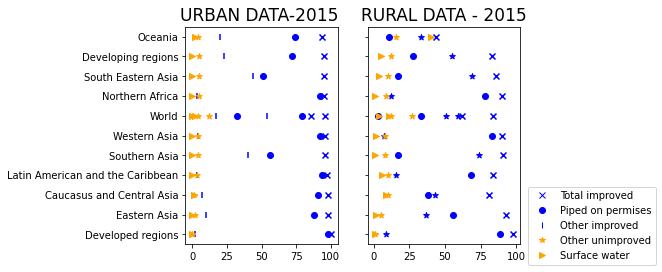

In [40]:
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.scatter(df_summary2015['Urban', 'Improved', 'Total improved 3'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
ax0.scatter(df_summary2015['Urban', 'Improved', 'Piped on premises 4'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
ax0.scatter(df_summary2015['Urban', 'Improved', 'Other improved 5'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='|', color= 'blue'
                )
ax0.scatter(df_summary2015['Urban', 'Unimproved', 'Other unimproved 6'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
ax0.scatter(df_summary2015['Urban', 'Unimproved', 'Surface water 7'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
ax0.set_title('URBAN DATA-2015 ',fontsize = 17)

ax1.scatter(df_summary2015['Rural', 'Improved', 'Total improved 8'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
ax1.scatter(df_summary2015['Rural', 'Improved', 'Piped on premises 9'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
ax1.scatter(df_summary2015['Rural', 'Improved', 'Other improved 10'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'blue'
                )
ax1.scatter(df_summary2015['Rural', 'Unimproved', 'Other unimproved 11'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
ax1.scatter(df_summary2015['Rural', 'Unimproved', 'Surface water 12'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
ax1.set_title('RURAL DATA - 2015',fontsize = 17)
ax1.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}, loc='upper left', borderaxespad=16)

#### Total

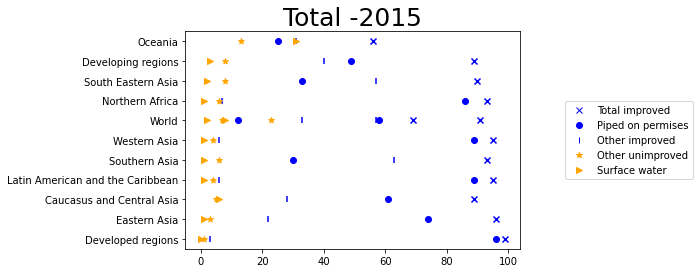

In [41]:
plt.scatter(df_summary2015['Total', 'Improved', 'Total improved 13'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='x', color= 'blue'
                )
plt.scatter(df_summary2015['Total', 'Improved', 'Piped on premises 14'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='o', color= 'blue'
                )
plt.scatter(df_summary2015['Total', 'Improved', 'Other improved 15'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='|', color= 'blue'
                )
plt.scatter(df_summary2015['Total', 'Unimproved', 'Other unimproved 16'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='*', color= 'orange'
                )
plt.scatter(df_summary2015['Total', 'Unimproved', 'Surface water 17'],
                 df_summary2015['Data', 'Areas', 'Countries and areas 1'],
                 marker='>', color= 'orange'
                )
plt.title('Total -2015',fontsize = 25)
plt.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}, loc='center left', borderaxespad=38)

## Countries Data analysis

In [55]:
len(df_countries['Data', 'Areas', 'Countries and areas 1'].unique())

215

In [56]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Data, Areas, ISO Code)                   430 non-null    object
 1   (Data, Areas, Countries and areas 1)      430 non-null    object
 2   (Data, Areas, Year 2)                     430 non-null    object
 3   (Urban, Improved, Total improved 3)       428 non-null    object
 4   (Urban, Improved, Piped on premises 4)    428 non-null    object
 5   (Urban, Improved, Other improved 5)       428 non-null    object
 6   (Urban, Unimproved, Other unimproved 6)   428 non-null    object
 7   (Urban, Unimproved, Surface water 7)      428 non-null    object
 8   (Rural, Improved, Total improved 8)       418 non-null    object
 9   (Rural, Improved, Piped on premises 9)    418 non-null    object
 10  (Rural, Improved, Other improved 10)      418 non-

### Data cleaning

In [57]:


df_table=df_countries[df_countries['Urban', 'Improved', 'Piped on premises 4']!="-"]
df_table = df_table[df_table[('Data', 'Areas', 'Countries and areas 1')].notna()]
df_table[('Urban', 'Improved', 'Piped on premises 4')].unique()

array(['3', '31', '98', '86', '87', '82', '100', '19', '32', '94', '65',
       '89', '23', '73', '15', '34', '80', '96', '93', '40', '92', '99',
       '11', '27', '49', '75', '25', '28', '63', '91', '8', '4', '7',
       '78', '95', '62', '37', '50', '66', '77', '83', '48', '17', '60',
       '76', '70', '88', '13', '41', '39', '10', '56', '97', '72', '52',
       '69', '14', '79', '24', '85', '47', '54', '33', '90', '55', '45',
       '43', '67', '64', '26', '22', '16', '18', '42', '44', '20', '68',
       '30', '51', '61', '59', '81', '0', '6', '74', nan, '84', '36'],
      dtype=object)

In [58]:
df_table[('Total', 'Improved', 'Other improved 15') ].unique()

array(['-', '43', '13', '24', '7', '0', '41', '34', '1', '29', '21', '63',
       '75', '9', '28', '19', '52', '60', '42', '16', '6', '70', '22',
       '10', '4', '14', '74', '66', '69', '55', '40', '59', '33', '56',
       '38', '45', '2', '39', '11', '3', '51', '53', '17', '44', '26',
       '37', '15', '30', '49', '18', '12', '65', '57', '20', '27', '8',
       '47', '32', '73', '31', '54', '48', '36', '71', '23', '82', '80',
       '61', '89', '92', '25', '35', '68', '67', '58', '64', '5', '62',
       '46'], dtype=object)

In [59]:
df_table=df_table[df_table[('Total', 'Improved', 'Other improved 15')]!="-"]
df_table[('Total', 'Improved', 'Other improved 15') ].unique()

array(['43', '13', '24', '7', '0', '41', '34', '1', '29', '21', '63',
       '75', '9', '28', '19', '52', '60', '42', '16', '6', '70', '22',
       '10', '4', '14', '74', '66', '69', '55', '40', '59', '33', '56',
       '38', '45', '2', '39', '11', '3', '51', '53', '17', '44', '26',
       '37', '15', '30', '49', '18', '12', '65', '57', '20', '27', '8',
       '47', '32', '73', '31', '54', '48', '36', '71', '23', '82', '80',
       '61', '89', '92', '25', '35', '68', '67', '58', '64', '5', '62',
       '46'], dtype=object)

#### Split data

In [60]:
df_4_15=df_table[[('Data', 'Areas', 'Year 2'),
                  ('Data', 'Areas', 'Countries and areas 1'),
                  ('Urban', 'Improved', 'Piped on premises 4'),
                  ('Total', 'Improved', 'Other improved 15')]]
df_4_15.info()
df_4_15[('Total', 'Improved', 'Other improved 15') ].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 429
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   (Data, Areas, Year 2)                   313 non-null    object
 1   (Data, Areas, Countries and areas 1)    313 non-null    object
 2   (Urban, Improved, Piped on premises 4)  313 non-null    object
 3   (Total, Improved, Other improved 15)    313 non-null    object
dtypes: object(4)
memory usage: 12.2+ KB


array(['43', '13', '24', '7', '0', '41', '34', '1', '29', '21', '63',
       '75', '9', '28', '19', '52', '60', '42', '16', '6', '70', '22',
       '10', '4', '14', '74', '66', '69', '55', '40', '59', '33', '56',
       '38', '45', '2', '39', '11', '3', '51', '53', '17', '44', '26',
       '37', '15', '30', '49', '18', '12', '65', '57', '20', '27', '8',
       '47', '32', '73', '31', '54', '48', '36', '71', '23', '82', '80',
       '61', '89', '92', '25', '35', '68', '67', '58', '64', '5', '62',
       '46'], dtype=object)

#### Changing type to float

In [61]:
df_4_15[('Total', 'Improved', 'Other improved 15')]=df_4_15[('Total', 'Improved', 'Other improved 15')].astype('float64')
df_4_15['Data', 'Areas', 'Year 2']=df_4_15[('Data', 'Areas', 'Year 2')].astype('int')


C:\Users\E9951616\AppData\Local\Temp/ipykernel_23356/1035575457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_15[('Total', 'Improved', 'Other improved 15')]=df_4_15[('Total', 'Improved', 'Other improved 15')].astype('float64')
C:\Users\E9951616\AppData\Local\Temp/ipykernel_23356/1035575457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4_15['Data', 'Areas', 'Year 2']=df_4_15[('Data', 'Areas', 'Year 2')].astype('int')


### Corelation
Analyze Unnamed: 4 (Total improved) in relation to Unnamed: 15(Other improved)

#### Pearson correlation

In [62]:
cor_persona=df_4_15.corr()
cor_persona.style.background_gradient(cmap='coolwarm')

,,,Data,Total
,,,Areas,Improved
,,,Year 2,Other improved 15
Data,Areas,Year 2,1.000000,0.021698
Total,Improved,Other improved 15,0.021698,1.000000


#### Sparman correlation 

In [63]:
cor_spermana=df_4_15.corr(method='spearman')
cor_spermana.style.background_gradient(cmap='coolwarm')

,,,Data,Total
,,,Areas,Improved
,,,Year 2,Other improved 15
Data,Areas,Year 2,1.000000,-0.005346
Total,Improved,Other improved 15,-0.005346,1.000000


In [64]:
df_4_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 1 to 429
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   (Data, Areas, Year 2)                   313 non-null    int32  
 1   (Data, Areas, Countries and areas 1)    313 non-null    object 
 2   (Urban, Improved, Piped on premises 4)  313 non-null    object 
 3   (Total, Improved, Other improved 15)    313 non-null    float64
dtypes: float64(1), int32(1), object(2)
memory usage: 11.0+ KB


#### Dependency graph - correlation including outliers

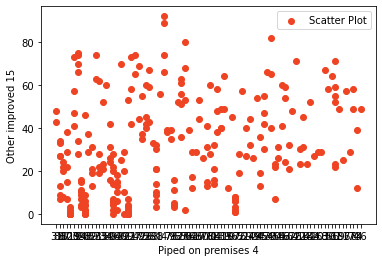

In [65]:
# Collecting X and
X = df_4_15['Urban', 'Improved', 'Piped on premises 4']
Y = df_4_15['Total', 'Improved', 'Other improved 15']

plt.scatter(X, Y, c='#ef4423', label='Scatter Plot')
 
plt.xlabel('Piped on premises 4')
plt.ylabel('Other improved 15')
plt.legend()
plt.show() 

